<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import random
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dogs.rar to dogs.rar


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cats.rar to cats.rar


In [ ]:
!unrar x cats.rar
!unrar x dogs.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from cats.rar

Creating    cats                                                      OK
Extracting  cats/0_0001.jpg                                                0%  OK 
Extracting  cats/0_0002.jpg                                                0%  OK 
Extracting  cats/0_0003.jpg                                                0%  OK 
Extracting  cats/0_0004.jpg                                                0%  OK 
Extracting  cats/0_0005.jpg                                                0%  OK 
Extracting  cats/0_0006.jpg                                                0%  OK 
Extracting  cats/0_0007.jpg                                                0%  OK 
Extracting  cats/0_0008.jpg                                                0%  OK 
Extracting  cats/0_0009.jpg                                                0%  O

In [ ]:
!mkdir -p /content/dataset/cats /content/dataset/dogs
!mv /content/cats/* /content/dataset/cats/
!mv /content/dogs/* /content/dataset/dogs/

# Preparetation

1.ตรวจสอบ นามสกุลไฟล์

In [ ]:
# กำหนดนามสกุลที่รองรับ
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# กำหนดโฟลเดอร์
folder_path = 'dataset/cats'  # เปลี่ยนเป็นโฟลเดอร์ที่คุณต้องการตรวจสอบ

# ตรวจสอบไฟล์ในโฟลเดอร์
for filename in os.listdir(folder_path):
    ext = filename.split('.')[-1].lower()  # นามสกุลเป็นตัวพิมพ์เล็ก
    if ext in image_exts:
        pass
    else:
        print(f"Invalid extension: {filename}")


2.สุ่มรูปภาพมาดู

In [ ]:
# กำหนดโฟลเดอร์สำหรับทั้งแมวและสุนัข
cat_folder = 'dataset/cats'
dog_folder = 'dataset/dogs'

# สร้างลิสต์เก็บรูปภาพ
image_list = []

# ฟังก์ชันโหลดภาพจากโฟลเดอร์
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        try:
            # โหลดและแปลงภาพ
            image = tf.keras.utils.load_img(image_path,color_mode='grayscale', target_size=(256, 256))
            image_array = tf.keras.utils.img_to_array(image)
            image_list.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# โหลดภาพจากทั้งสองโฟลเดอร์
load_images_from_folder(cat_folder)
load_images_from_folder(dog_folder)

# แปลงลิสต์เป็น NumPy array
image_array = np.array(image_list)

# ตรวจสอบขนาดของ array
print("Shape of all images:", image_array.shape)

Shape of all images: (2000, 256, 256, 1)


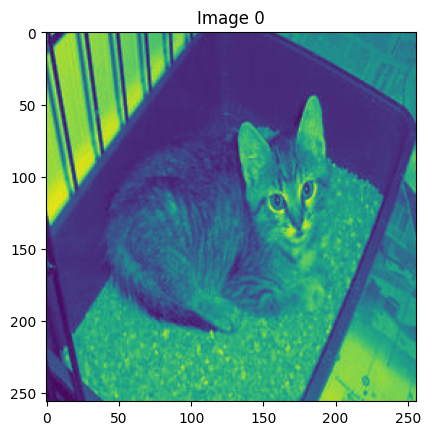

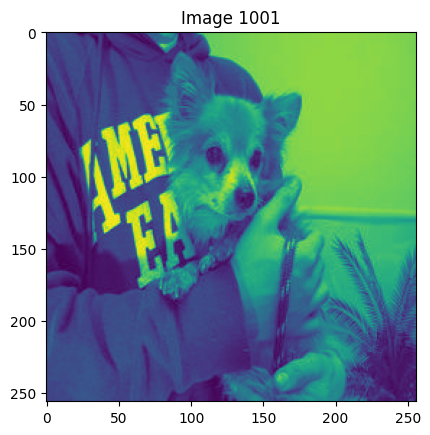

In [ ]:
plt.imshow(image_array[0].astype("uint8"))
plt.title("Image 0")
plt.show()

plt.imshow(image_array[1001].astype("uint8"))
plt.title("Image 1001")
plt.show()

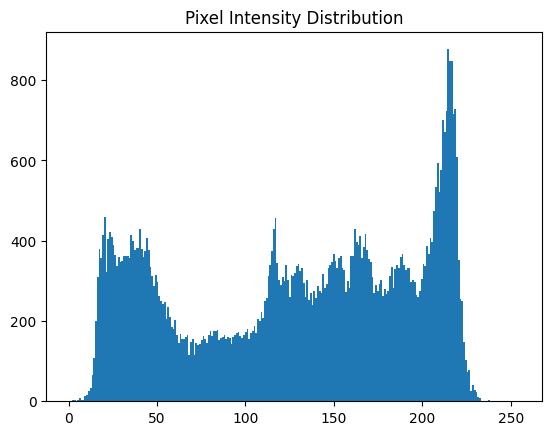

In [ ]:
pixels = np.array(image_array[2])
plt.hist(pixels.ravel(), bins=256, range=(0, 255))
plt.title("Pixel Intensity Distribution")
plt.show()

3.Normalization

In [ ]:
# Normalize ทุกภาพหลังจากแปลงเป็น array
def normalize_images(image_list):
    return image_array / 255.0

# หลังจากโหลดภาพทั้งหมด
normalized_image_array = normalize_images(image_array)

# ตรวจสอบขนาดและค่าของ array
print("Shape of normalized images:", normalized_image_array.shape)
print("Min value:", normalized_image_array.min())
print("Max value:", normalized_image_array.max())

Shape of normalized images: (2000, 256, 256, 1)
Min value: 0.0
Max value: 1.0


In [ ]:
normalized_image_array[:1]

array([[[[0.13333334],
         [0.10196079],
         [0.07843138],
         ...,
         [0.37254903],
         [0.37254903],
         [0.39215687]],

        [[0.14509805],
         [0.12156863],
         [0.05098039],
         ...,
         [0.4       ],
         [0.40392157],
         [0.41960785]],

        [[0.34509805],
         [0.08627451],
         [0.07058824],
         ...,
         [0.42352942],
         [0.41960785],
         [0.43137255]],

        ...,

        [[0.04313726],
         [0.01568628],
         [0.02745098],
         ...,
         [0.627451  ],
         [0.7490196 ],
         [0.7490196 ]],

        [[0.04705882],
         [0.03137255],
         [0.03137255],
         ...,
         [0.6313726 ],
         [0.7490196 ],
         [0.7372549 ]],

        [[0.04705882],
         [0.03921569],
         [0.03529412],
         ...,
         [0.6392157 ],
         [0.7490196 ],
         [0.7294118 ]]]], dtype=float32)

# spilting data

In [ ]:
from sklearn.model_selection import train_test_split

labels = np.array([0] * 1000 + [1] * 1000)  # 0 = แมว, 1 = หมา

# แบ่งข้อมูล train (80%), temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    normalized_image_array, labels, test_size=0.2, stratify=labels, random_state=42
)

# แบ่ง temp เป็น validation (10%) และ test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# ตรวจสอบขนาดของชุดข้อมูล
print(f"Train set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test set: {X_test.shape}, Labels: {y_test.shape}")


Train set: (1600, 256, 256, 1), Labels: (1600,)
Validation set: (200, 256, 256, 1), Labels: (200,)
Test set: (200, 256, 256, 1), Labels: (200,)


# Train model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# สร้างโมเดล CNN
def create_cnn_model(input_shape):
    model = models.Sequential([
        # Layer 1: Convolution + MaxPooling
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Layer 2: Convolution + MaxPooling
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Layer 3: Convolution + MaxPooling
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten Layer
        layers.Flatten(),

        # Fully Connected Layer
        layers.Dense(128, activation='relu'),

        # Output Layer
        layers.Dense(1, activation='sigmoid')  # ใช้ sigmoid เพราะเป็นปัญหา binary classification
    ])
    return model

# กำหนด input_shape ให้เหมาะสมกับ normalized_image_array
input_shape = (256, 256, 1)  # รูปภาพขนาด 128x128x3 (RGB)
model = create_cnn_model(input_shape)

# สรุปโมเดล
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,838,529 (56.60 MB)

 Trainable params: 14,838,529 (56.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',  # ใช้ Adam optimizer
    loss='binary_crossentropy',  # ใช้ Binary Crossentropy สำหรับ binary classification
    metrics=['accuracy']
)

In [ ]:
# Train โมเดล
history = model.fit(
    X_train, y_train,  # ข้อมูล train
    validation_data=(X_val, y_val),  # ข้อมูล validation
    epochs=5,  # จำนวนรอบการ train
    batch_size=32,  # ขนาด batch
    verbose=1  # แสดงผลการ train ในแต่ละ epoch
)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.5337 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6985
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.5792 - loss: 0.6716 - val_accuracy: 0.6300 - val_loss: 0.6117
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.6650 - loss: 0.6084 - val_accuracy: 0.6800 - val_loss: 0.5694
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.7697 - loss: 0.4929 - val_accuracy: 0.7200 - val_loss: 0.5834
Epoch 5/10
28/50 ━━━━━━━━━━━━━━━━━━━━ 1:50 5s/step - accuracy: 0.8363 - loss: 0.3795

KeyboardInterrupt: 